# **Inference RT-DETR**

In [1]:
import torch

# CUDAが使えるかどうかを確認
cuda_available = torch.cuda.is_available()

if cuda_available:
    print(f"CUDA is available! GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available.")
     

CUDA is available! GPU: Quadro RTX 5000


In [2]:
#環境の確認
import torch
import sys
print(f"Python version: {sys.version}")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"PyTorch CUDA version: {torch.version.cuda}")

Python version: 3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]
PyTorch version: 2.4.1+cu121
CUDA available: True
PyTorch CUDA version: 12.1


In [ ]:
# Inference London-bus image
from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt
import os

# RTDETRモデルのダウンロードと初期化
model_path = r'models\rtdetr-l.pt'

try:
    model = RTDETR(model_path)
except:
    # モデルディレクトリが存在しない場合は作成
    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    
    # モデルをダウンロードして指定したパスに保存
    wget.download('https://github.com/ultralytics/assets/releases/download/v0.0.0/rtdetr-l.pt', model_path)
    model = RTDETR(model_path)

# 推論実行
image_path = 'london-buses.jpg'
results = model(image_path)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    # plt.figure(figsize=(12, 8))
    # plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # #plt.show()
    
    # 結果の保存
    cv2.imwrite('result.jpg', r.plot())


image 1/1 c:\Users\ykita\ROP_AI_project\london-buses.jpg: 640x640 16 persons, 2 cars, 1 bus, 249.8ms
Speed: 7.0ms preprocess, 249.8ms inference, 13.7ms postprocess per image at shape (1, 3, 640, 640)


# **Test new model**


image 1/1 C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1698\IMG_1698_0003.jpg: 640x640 1 Lens, 247.0ms
Speed: 11.0ms preprocess, 247.0ms inference, 12.4ms postprocess per image at shape (1, 3, 640, 640)
0 0.464370 0.459860 0.574535 0.322821


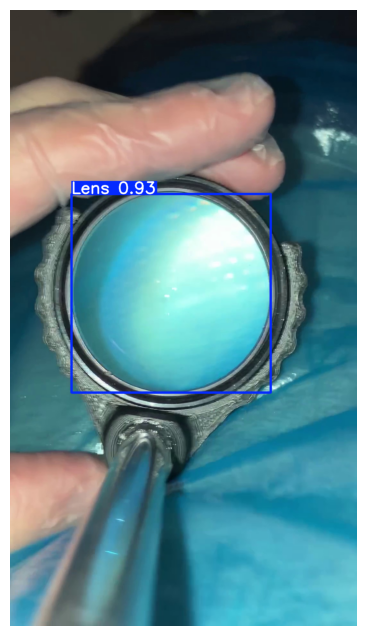

In [2]:
from ultralytics import RTDETR
import cv2
import matplotlib.pyplot as plt

model = RTDETR(r"C:\Users\ykita\ROP_AI_project\models\rtdetr-l-1699_1703.pt")

# 推論実行
image_path = r'C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1698\IMG_1698_0003.jpg'
results = model(image_path, save=False)

for r in results:
    boxes = r.boxes  # YOLOv8の場合

    # YOLO形式出力
    for box in boxes:
        cls_id = int(box.cls[0])  # クラスID
        x_center, y_center, width, height = box.xywhn[0]

        # YOLO形式: class x_center y_center width height
        # 小数点以下6桁で出力したい場合
        print(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    #検出結果を画像に描画して表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    #結果の保存
    cv2.imwrite('result.jpg', r.plot())


In [ ]:
#Web画像のinference

from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# モデルが未定義ならロードする
try:
    model  # 変数modelが定義されているか確認
except NameError:
    print("modelが未定義のため、ロードを実行します。")
    model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 画像URLの指定
url = "https://365dentist.jp/wp-content/uploads/2023/06/26579868_s.jpg"

# 画像のダウンロード
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 推論実行
results = model(img)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# **YOLO11-seg トレーニングフォルダ構成**
```
準備する形
project_root/
│
└── data/
    |
    │
    ├── images/ --> データセットから移行
    │   ├── img1.jpg
    │   ├── img2.jpg
    │   └── ...
    │   
    ├── labels/ --> CVATからそのまま移す      　　　
    |       ├── img1.txt
    |       ├── img2.txt
    |       └── ...
    |
    | 
    ├── Train.txt　　　　　　# トレーニングファイルのリスト --> CVATからそのまま移す
    │
    └── dataset.yaml        # データセット設定ファイル  --> 新たに作成




最終形
project_root/
│
└── data/
    |
    │
    ├── train/
    │   ├── images/       # トレーニング用の画像
    │   │   ├── img1.jpg
    │   │   ├── img2.jpg
    │   │   └── ...
    │   │
    │   └── labels/      # トレーニング用のラベル（アノテーション）
    │       ├── img1.txt
    │       ├── img2.txt
    │       └── ...
    │
    ├── val/
    │   ├── images/      # 検証用の画像
    │   │   ├── img1.jpg
    │   │   └── ...
    │   │
    │   └── labels/     # 検証用のラベル
    │       ├── img1.txt
    │       └── ...
    │
    ├── test/           # (オプション) テスト用のデータセット
    |   ├── images/
    |   └── labels/
    │
    ├── Train.txt           # トレーニングファイルのリスト
    │
    └── dataset.yaml        # データセット設定ファイル:
```


## **dataset.yaml**

```
# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: ./data/images/train
val: ./data/images/valid

# number of classes
nc: 3

# class names:
  0: Fundus
  1: Disc
  2: Macula

```

In [20]:
# データセットの構造を作成するためのコード
# 
# 1. 画像ファイルのコピー元ディレクトリとコピー先ディレクトリを設定
# 2. 処理対象のディレクトリリストを定義
# 3. 各ディレクトリに対して以下の処理を実行:
#   - 新しいディレクトリを作成 (_internalを付加)
#   - 既存のディレクトリがある場合は削除
#   - 元の画像ディレクトリから画像を読み込み
#   - 画像の中心座標を計算
#   - 画像処理:
#     * 中心から半径rの円形マスクを作成
#     * マスク外の領域を(114,114,114)の灰色で塗りつぶし
#     * 円形領域内の画像のみを残す
#     * 処理済み画像を新しいディレクトリに保存
#   - 進捗状況をプログレスバーで表示


import shutil
import os
from tqdm import tqdm

# コピー元ディレクトリ
source_images_dir = r'C:\Users\ykita\ROP_AI_project\ROP_image'

# コピー先ディレクトリ
destination_images_dir = r'C:\Users\ykita\ROP_AI_project\ROP_image'

# 処理対象のディレクトリリスト
image_dir = ['IMG_1703_lens', 'IMG_1702_lens', 'IMG_1699_lens', ]
add_argument = "_internal"

import cv2
import numpy as np
import os
from tqdm import tqdm

# 各ディレクトリに対して処理を実行
for dir_name in image_dir:
    # 新しいディレクトリ名を作成
    new_dir = dir_name + add_argument
    new_dir_path = os.path.join(destination_images_dir, new_dir)
    
    # ディレクトリが存在する場合は削除
    if os.path.exists(new_dir_path):
        shutil.rmtree(new_dir_path)
    # 新規ディレクトリ作成    
    os.makedirs(new_dir_path)

    # 元の画像ディレクトリのパス
    source_dir = os.path.join(source_images_dir, dir_name)
    
    # ディレクトリ内の全画像に対して処理
    if os.path.isdir(source_dir):
        files = os.listdir(source_dir)
        for file in tqdm(files, desc=f"{dir_name}の処理中"):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # 画像読み込み
                img_path = os.path.join(source_dir, file)
                img = cv2.imread(img_path)
                
                if img is not None:
                    height, width = img.shape[:2]
                    
                    # 画像の中心座標を計算
                    center_x = width // 2
                    center_y = height // 2
                    
                    # 縦横比チェック
                    aspect_ratio = height / width
                    if 0.8 <= aspect_ratio <= 1.2:
                        # マスク作成
                        mask = np.zeros((height, width), dtype=np.uint8)
                        radius = min(height, width) // 2
                        cv2.circle(mask, (center_x, center_y), radius, 255, -1)
                        
                        # マスク適用
                        result = img.copy()
                        result[mask == 0] = (114, 114, 114)  # 黒から灰色に変更
                        
                        # 処理済み画像を保存
                        output_path = os.path.join(new_dir_path, file)
                        cv2.imwrite(output_path, result)


IMG_1699_lensの処理中: 100%|██████████| 346/346 [00:04<00:00, 76.21it/s]


In [21]:
# このスクリプトは、指定されたディレクトリ内のラベルファイルと画像ファイルを
# 以下のようにコピーします：
#
# 1. source_labels_dir/LABELS_xxxx/ 内の全ファイル → destination_labels_dir/
# 2. source_images_dir/IMG_xxxx/ 内の全ファイル → destination_images_dir/
#
# 処理対象のディレクトリは、label_dirとimage_dirのリストで指定します。
# 各ディレクトリ内のファイルは全て、指定された出力先ディレクトリにコピーされます。
# tqdmを使用して、コピーの進捗状況をプログレスバーで表示します。

import shutil
import os
from tqdm import tqdm

# コピー元ディレクトリ
source_labels_dir = r'C:\Users\ykita\ROP_AI_project\ROP_image'
source_images_dir = r'C:\Users\ykita\ROP_AI_project\ROP_image'

# コピー先ディレクトリ
destination_labels_dir = r'C:\Users\ykita\ROP_AI_project\data\labels'
destination_images_dir = r'C:\Users\ykita\ROP_AI_project\data\images'

# 処理対象のディレクトリリスト
label_dir = ['LABELS_1703_lens_seg', 'LABELS_1702_lens_seg','LABELS_1699_lens_seg',]
image_dir = ['IMG_1703_lens_internal', 'IMG_1702_lens_internal', 'IMG_1699_lens_internal', ]


# destination_labels_dirとdestination_images_dirが存在する場合は削除し、新規作成する
if os.path.exists(destination_labels_dir):
    shutil.rmtree(destination_labels_dir)
os.makedirs(destination_labels_dir, exist_ok=True)

if os.path.exists(destination_images_dir):
    shutil.rmtree(destination_images_dir)
os.makedirs(destination_images_dir, exist_ok=True)

# ラベルファイルのコピー
for label_folder in tqdm(label_dir, desc="ラベルファイルのコピー中"):
    source_folder = os.path.join(source_labels_dir, label_folder)
    # フォルダ内の全ファイルを取得
    if os.path.isdir(source_folder):
        files = os.listdir(source_folder)
        for file in files:
            src = os.path.join(source_folder, file)
            dst = os.path.join(destination_labels_dir, file)
            shutil.copy(src, dst)
            print(f"コピーしました: {src} -> {dst}")

# 画像ファイルのコピー
for image_folder in tqdm(image_dir, desc="画像ファイルのコピー中"):
    source_folder = os.path.join(source_images_dir, image_folder)
    # フォルダ内の全ファイルを取得
    if os.path.isdir(source_folder):
        files = os.listdir(source_folder)
        for file in files:
            src = os.path.join(source_folder, file)
            dst = os.path.join(destination_images_dir, file)
            shutil.copy(src, dst)
            print(f"コピーしました: {src} -> {dst}")

ラベルファイルのコピー中:   0%|          | 0/3 [00:00<?, ?it/s]

コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1703_lens_seg\IMG_1703_0171.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1703_0171.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1703_lens_seg\IMG_1703_0172.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1703_0172.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1703_lens_seg\IMG_1703_0173.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1703_0173.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1703_lens_seg\IMG_1703_0174.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1703_0174.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1703_lens_seg\IMG_1703_0179.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1703_0179.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1703_lens_seg\IMG_1703_0180.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1703_0180.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1703_lens_seg\IMG_1703_0181.txt -> C:\

ラベルファイルのコピー中:  33%|███▎      | 1/3 [00:01<00:03,  1.55s/it]

コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1703_lens_seg\IMG_1703_0725.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1703_0725.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1703_lens_seg\IMG_1703_0726.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1703_0726.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1703_lens_seg\IMG_1703_0727.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1703_0727.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1703_lens_seg\IMG_1703_0728.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1703_0728.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1703_lens_seg\IMG_1703_0729.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1703_0729.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1703_lens_seg\IMG_1703_0730.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1703_0730.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1703_lens_seg\IMG_1703_0731.txt -> C:\

ラベルファイルのコピー中:  67%|██████▋   | 2/3 [00:02<00:01,  1.33s/it]

コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1702_lens_seg\IMG_1702_1173.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1702_1173.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1702_lens_seg\IMG_1702_1174.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1702_1174.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1702_lens_seg\IMG_1702_1175.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1702_1175.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1702_lens_seg\IMG_1702_1184.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1702_1184.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1702_lens_seg\IMG_1702_1185.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1702_1185.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1702_lens_seg\IMG_1702_1186.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1702_1186.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1702_lens_seg\IMG_1702_1187.txt -> C:\

ラベルファイルのコピー中: 100%|██████████| 3/3 [00:02<00:00,  1.00it/s]


コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1699_lens_seg\IMG_1699_0170.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1699_0170.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1699_lens_seg\IMG_1699_0171.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1699_0171.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1699_lens_seg\IMG_1699_0172.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1699_0172.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1699_lens_seg\IMG_1699_0173.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1699_0173.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1699_lens_seg\IMG_1699_0174.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1699_0174.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1699_lens_seg\IMG_1699_0175.txt -> C:\Users\ykita\ROP_AI_project\data\labels\IMG_1699_0175.txt
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\LABELS_1699_lens_seg\IMG_1699_0176.txt -> C:\

画像ファイルのコピー中:   0%|          | 0/3 [00:00<?, ?it/s]

コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1703_lens_internal\IMG_1703_0000.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1703_0000.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1703_lens_internal\IMG_1703_0001.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1703_0001.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1703_lens_internal\IMG_1703_0002.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1703_0002.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1703_lens_internal\IMG_1703_0003.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1703_0003.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1703_lens_internal\IMG_1703_0004.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1703_0004.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1703_lens_internal\IMG_1703_0005.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1703_0005.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1703_lens_internal\IMG_1703_0

画像ファイルのコピー中:  33%|███▎      | 1/3 [00:09<00:19,  9.87s/it]

コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1703_lens_internal\IMG_1703_0875.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1703_0875.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1703_lens_internal\IMG_1703_0876.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1703_0876.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1703_lens_internal\IMG_1703_0877.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1703_0877.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1703_lens_internal\IMG_1703_0878.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1703_0878.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1703_lens_internal\IMG_1703_0879.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1703_0879.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1703_lens_internal\IMG_1703_0886.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1703_0886.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1703_lens_internal\IMG_1703_0

画像ファイルのコピー中:  67%|██████▋   | 2/3 [00:22<00:11, 11.71s/it]

コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1702_lens_internal\IMG_1702_1304.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1702_1304.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1702_lens_internal\IMG_1702_1305.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1702_1305.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1702_lens_internal\IMG_1702_1306.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1702_1306.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1702_lens_internal\IMG_1702_1307.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1702_1307.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1702_lens_internal\IMG_1702_1308.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1702_1308.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1702_lens_internal\IMG_1702_1309.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1702_1309.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1702_lens_internal\IMG_1702_1

画像ファイルのコピー中: 100%|██████████| 3/3 [00:26<00:00,  8.77s/it]

コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1699_lens_internal\IMG_1699_0333.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1699_0333.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1699_lens_internal\IMG_1699_0334.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1699_0334.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1699_lens_internal\IMG_1699_0335.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1699_0335.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1699_lens_internal\IMG_1699_0336.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1699_0336.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1699_lens_internal\IMG_1699_0337.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1699_0337.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1699_lens_internal\IMG_1699_0338.jpg -> C:\Users\ykita\ROP_AI_project\data\images\IMG_1699_0338.jpg
コピーしました: C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1699_lens_internal\IMG_1699_0

In [22]:
#segmentationはcvatのラベルが1スタートなので、0スタートに修正
"""
# ラベルインデックス調整スクリプト
# 目的：YOLOフォーマットのアノテーションファイルのラベルインデックスを1始まりから0始まりに変更
# 対象：指定されたディレクトリ内のすべての.txtファイル
# 
# 入力ファイルの例：
# 1 0.399550 0.361382 0.482096 0.225870 ...  # ラベル1で始まる
# 2 0.452748 0.391491 0.488882 0.403540 ...  # ラベル2で始まる
#
# 出力ファイルの例：
# 0 0.399550 0.361382 0.482096 0.225870 ...  # ラベル0に変更
# 1 0.452748 0.391491 0.488882 0.403540 ...  # ラベル1に変更
#
# 使用方法：
# 1. ラベルファイルが含まれているディレクトリパスを設定
# 2. スクリプトを実行すると、すべての.txtファイルを処理
# 3. 元のファイルが直接更新されます
#
# 注意：元のファイルが直接更新されるため、実行前にファイルのバックアップを
# 取ることをお勧めします
"""

import os
from pathlib import Path

def adjust_labels(input_path):
    """
    ラベルファイルを読み込み、すべてのラベルインデックスを1減らします
    （1始まりから0始まりに変更）。
    元のファイルを調整後の内容で上書きします。
    
    引数：
        input_path (str): 入力ラベルファイルのパス
    """
    # 元のファイル内容を読み込み
    with open(input_path, 'r') as f:
        lines = f.readlines()
    
    adjusted_lines = []
    for line in lines:
        parts = line.strip().split()
        if parts:  # 空行をスキップ
            # ラベル（最初の数字）を1減らす
            adjusted_line = f"{int(parts[0]) - 1} {' '.join(parts[1:])}"
            adjusted_lines.append(adjusted_line)
    
    # 同じファイルに書き戻す
    with open(input_path, 'w') as f:
        f.write('\n'.join(adjusted_lines))

def process_directory(directory_path):
    """
    指定されたディレクトリ内のすべての.txtファイルを処理します。
    
    引数：
        directory_path (str): ラベルファイルを含むディレクトリのパス
    """
    directory = Path(directory_path)
    txt_files = list(directory.glob('*.txt'))
    total_files = len(txt_files)
    
    print(f"{directory_path} 内で {total_files} 個の.txtファイルが見つかりました")
    
    for i, file_path in enumerate(txt_files, 1):
        try:
            adjust_labels(str(file_path))
            print(f"処理完了 [{i}/{total_files}]: {file_path.name}")
        except Exception as e:
            print(f"エラーが発生しました {file_path.name}: {str(e)}")

# ディレクトリパス
labels_dir = r"C:\Users\ykita\ROP_AI_project\data\labels"

# ディレクトリ内のすべてのファイルを処理
process_directory(labels_dir)
print("\n処理が完了しました！")

C:\Users\ykita\ROP_AI_project\data\labels 内で 1449 個の.txtファイルが見つかりました
処理完了 [1/1449]: IMG_1699_0091.txt
処理完了 [2/1449]: IMG_1699_0092.txt
処理完了 [3/1449]: IMG_1699_0093.txt
処理完了 [4/1449]: IMG_1699_0094.txt
処理完了 [5/1449]: IMG_1699_0095.txt
処理完了 [6/1449]: IMG_1699_0096.txt
処理完了 [7/1449]: IMG_1699_0097.txt
処理完了 [8/1449]: IMG_1699_0098.txt
処理完了 [9/1449]: IMG_1699_0099.txt
処理完了 [10/1449]: IMG_1699_0100.txt
処理完了 [11/1449]: IMG_1699_0101.txt
処理完了 [12/1449]: IMG_1699_0102.txt
処理完了 [13/1449]: IMG_1699_0103.txt
処理完了 [14/1449]: IMG_1699_0104.txt
処理完了 [15/1449]: IMG_1699_0105.txt
処理完了 [16/1449]: IMG_1699_0106.txt
処理完了 [17/1449]: IMG_1699_0107.txt
処理完了 [18/1449]: IMG_1699_0108.txt
処理完了 [19/1449]: IMG_1699_0109.txt
処理完了 [20/1449]: IMG_1699_0110.txt
処理完了 [21/1449]: IMG_1699_0111.txt
処理完了 [22/1449]: IMG_1699_0112.txt
処理完了 [23/1449]: IMG_1699_0113.txt
処理完了 [24/1449]: IMG_1699_0114.txt
処理完了 [25/1449]: IMG_1699_0115.txt
処理完了 [26/1449]: IMG_1699_0116.txt
処理完了 [27/1449]: IMG_1699_0117.txt
処理完了 [28/1449]: IMG_16

In [23]:
# データの前処理
# 目的: 画像ファイルとラベルファイルの対応関係を確認
# 処理内容:
# 1. ラベルディレクトリとイメージディレクトリのパスを設定
# 2. 各ディレクトリからファイル名(拡張子なし)を取得
# 3. ラベルが存在しない画像ファイルを特定
# 4. 不一致の数を表示

import os

# ラベルとイメージのディレクトリパス
labels_dir = r"data\labels"
images_dir = r"data\images"

# ラベルファイルの basename (拡張子なし) を取得
label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt')}

# 画像ファイルの basename (拡張子なし) を取得
image_files = {os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg')}

# ラベルが存在しない画像ファイルを見つける
images_without_labels = image_files - label_files

# 結果を表示
print(f"ラベルが存在しない画像ファイルの数: {len(images_without_labels)}")

ラベルが存在しない画像ファイルの数: 1057


In [ ]:
# Detectionの場合は
# ラベルが存在しない画像ファイルを削除
for img_name in images_without_labels:
    img_path = os.path.join(images_dir, img_name + '.jpg')
    try:
        os.remove(img_path)
        print(f"削除しました: {img_path}")
    except OSError as e:
        print(f"削除に失敗しました {img_path}: {e}")

print("不一致ファイルの削除が完了しました")

In [24]:
# Segmentationの場合は
# 画像が存在しないlabelファイルに空のtxtを割り当て
import os

# ディレクトリのパス
labels_dir = r'C:\Users\ykita\ROP_AI_project\data\labels'
images_dir = r'C:\Users\ykita\ROP_AI_project\data\images'

# ラベルファイルの basename (拡張子なし) を取得
label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt')}
print(f"label_files: {label_files}")
print(f"len(label_files): {len(label_files)}")

# 画像ファイルの basename (拡張子なし) を取得
image_files = {os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg')}
print(f"image_files: {image_files}")
print(f"len(image_files): {len(image_files)}")

# ラベルが存在しない画像ファイルを見つける
labels_without_labels = image_files - label_files
print(labels_without_labels)

# 空のテキストファイルを割り当て
for label in labels_without_labels:
    label_path = os.path.join(labels_dir, label + '.txt')
    with open(label_path, 'w') as f:
        pass  # 空のファイルを作成
    print(f"空のテキストファイルを作成しました: {label_path}")

label_files: {'IMG_1702_0949', 'IMG_1699_0301', 'IMG_1703_0614', 'IMG_1703_0396', 'IMG_1702_0374', 'IMG_1702_1163', 'IMG_1703_0302', 'IMG_1702_0513', 'IMG_1699_0288', 'IMG_1702_1046', 'IMG_1703_0537', 'IMG_1702_1031', 'IMG_1703_0230', 'IMG_1702_0557', 'IMG_1703_0260', 'IMG_1702_0132', 'IMG_1703_0445', 'IMG_1702_1024', 'IMG_1702_1030', 'IMG_1702_1104', 'IMG_1703_0812', 'IMG_1702_0352', 'IMG_1702_0941', 'IMG_1703_0293', 'IMG_1702_0435', 'IMG_1703_0703', 'IMG_1702_1127', 'IMG_1702_1092', 'IMG_1702_1256', 'IMG_1703_0444', 'IMG_1702_1223', 'IMG_1699_0141', 'IMG_1702_0425', 'IMG_1702_1252', 'IMG_1702_1237', 'IMG_1699_0094', 'IMG_1702_0217', 'IMG_1702_0304', 'IMG_1702_0407', 'IMG_1702_0219', 'IMG_1702_1114', 'IMG_1702_0188', 'IMG_1702_1191', 'IMG_1702_0347', 'IMG_1702_0991', 'IMG_1702_0291', 'IMG_1702_0939', 'IMG_1703_0299', 'IMG_1703_0385', 'IMG_1702_0504', 'IMG_1703_0625', 'IMG_1703_0689', 'IMG_1702_0458', 'IMG_1702_0098', 'IMG_1702_1236', 'IMG_1702_1168', 'IMG_1702_1154', 'IMG_1699_0152', 

In [25]:
# 1. 指定されたディレクトリから画像ファイル(.jpg, .png, .tif)を取得
# 2. 画像ファイルをランダムに並び替え
# 3. train/validディレクトリを作成
# 4. データを8:2の比率で分割
# 5. 画像ファイルと対応するラベルファイル(.txt)を適切なディレクトリに移動

import os
import shutil
import random
from tqdm import tqdm

# データディレクトリのパス設定
data_img_dir = r"data\images"
data_label_dir = r"data\labels"
src_img_dir = r"data\images"
src_label_dir = r"data\labels"

# ソースディレクトリの画像ファイルを直接取得（サブディレクトリを除く）
image_files = [f for f in os.listdir(src_img_dir) 
               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')) 
               and os.path.isfile(os.path.join(src_img_dir, f))]

if not image_files:
    print("エラー: 画像ファイルが見つかりません")
else:
    print(f"見つかった画像ファイル数: {len(image_files)}")
    
    # train/validディレクトリの作成
    for split in ['train', 'valid']:
        img_split_dir = os.path.join(data_img_dir, split)
        label_split_dir = os.path.join(data_label_dir, split)
        
        os.makedirs(img_split_dir, exist_ok=True)
        os.makedirs(label_split_dir, exist_ok=True)

    # データの分割
    random.shuffle(image_files)
    train_size = int(len(image_files) * 0.8)
    train_files = image_files[:train_size]
    valid_files = image_files[train_size:]

    # ファイルの移動関数
    def move_files(files, split):
        for img_file in tqdm(files, desc=f"{split}データの移動"):
            try:
                # 画像ファイルの移動
                src_img_path = os.path.join(src_img_dir, img_file)
                dst_img_path = os.path.join(data_img_dir, split, img_file)
                
                if os.path.exists(src_img_path):
                    shutil.move(src_img_path, dst_img_path)

                # 対応するラベルファイルの移動
                label_file = os.path.splitext(img_file)[0] + '.txt'
                src_label_path = os.path.join(src_label_dir, label_file)
                dst_label_path = os.path.join(data_label_dir, split, label_file)
                
                if os.path.exists(src_label_path):
                    shutil.move(src_label_path, dst_label_path)

            except Exception as e:
                print(f"エラーが発生しました ({img_file}): {str(e)}")

    # trainとvalidそれぞれにファイルを移動
    move_files(train_files, 'train')
    move_files(valid_files, 'valid')

    print(f"訓練データ数: {len(train_files)}")
    print(f"検証データ数: {len(valid_files)}")
    print("データの分割と移動が完了しました")

見つかった画像ファイル数: 2506


validデータの移動: 100%|██████████| 502/502 [00:00<00:00, 876.44it/s] 

訓練データ数: 2004
検証データ数: 502
データの分割と移動が完了しました


In [26]:
import os

# ディレクトリのパス
train_images_dir = r'C:\Users\ykita\ROP_AI_project\data\images\train'
train_labels_dir = r'C:\Users\ykita\ROP_AI_project\data\labels\train'
val_images_dir = r'C:\Users\ykita\ROP_AI_project\data\images\valid'
val_labels_dir = r'C:\Users\ykita\ROP_AI_project\data\labels\valid'

# 対応の確認と削除
def check_and_remove_unmatched_files(images_dir, labels_dir):
    image_files = set(os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg'))
    label_files = set(os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt'))

    unmatched_images = image_files - label_files
    unmatched_labels = label_files - image_files

    # 対応のない画像ファイルを削除
    for image in unmatched_images:
        image_path = os.path.join(images_dir, image + '.jpg')
        if os.path.exists(image_path):
            print(f"画像ファイル {image_path} に対応するラベルがありません。削除しますか？ (y/n): ", end="")
            if input().strip().lower() == 'y':
                os.remove(image_path)
                print(f"{image_path} を削除しました。")

    # 対応のないラベルファイルを削除
    for label in unmatched_labels:
        label_path = os.path.join(labels_dir, label + '.txt')
        if os.path.exists(label_path):
            print(f"ラベルファイル {label_path} に対応する画像がありません。削除しますか？ (y/n): ", end="")
            if input().strip().lower() == 'y':
                os.remove(label_path)
                print(f"{label_path} を削除しました。")

# 訓練データと検証データの対応確認
check_and_remove_unmatched_files(train_images_dir, train_labels_dir)
check_and_remove_unmatched_files(val_images_dir, val_labels_dir)

### **YAMLファイルを作成 (for training)**

In [27]:
import yaml
import os

# data = {
#     'train': r'C:\Users\ykita\ROP_AI_project\data\images\train',
#     'val': r'C:\Users\ykita\ROP_AI_project\data\images\valid',
#     'nc': 1,
#     'names': {
#         0: 'Lens',
#     }
# }

data = {
    'train': r'C:\Users\ykita\ROP_AI_project\data\images\train',
    'val': r'C:\Users\ykita\ROP_AI_project\data\images\valid',
    'nc': 3,
    'names': {
        0: 'Fundus',
        1: 'Disc',
        2: 'Macula',
    }
}

yaml_path = 'data/data.yaml'

# dataディレクトリが存在しない場合は作成
os.makedirs('data', exist_ok=True)

# ファイルの存在確認
if os.path.exists(yaml_path):
    print(f"既存の {yaml_path} を上書きします。")
else:
    print(f"新規に {yaml_path} を作成します。")

# YAMLファイルの書き出し（既存ファイルは上書き）
with open(yaml_path, 'w', encoding='utf-8') as f:
    yaml.safe_dump(data, f, sort_keys=False, allow_unicode=True)

print("処理が完了しました。")

既存の data/data.yaml を上書きします。
処理が完了しました。


# **Train YOLO11-seg**

In [28]:
from ultralytics import RTDETR
from ultralytics import YOLO
import wget

# RTDETRモデルのダウンロードと初期化
try:
    #model = RTDETR('rtdetr-l.pt')
    # model = YOLO("yolo11lpt")  # load a pretrained model (recommended for training)
    model = YOLO("yolo11m-seg.pt")  # load a pretrained model (recommended for training)
except:
    #wget.download('https://github.com/ultralytics/assets/releases/download/v0.0.0/rtdetr-l.pt')
    #model = RTDETR('rtdetr-l.pt')
    wget.download('https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11l.pt')
    model = YOLO("yolo11l.pt")  # load a pretrained model (recommended for training)
    # wget.download('https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11m-seg.pt')
    # model = YOLO(r"C:\Users\ykita\ROP_AI_project\runs\segment\train9\weights\last.pt")  # load a pretrained model (recommended for training)
    
# Fine-tune
results = model.train(data=r'data\data.yaml', epochs=1000, patience=100, batch=8, imgsz=640, device=0, degrees=180, flipud=0.5, fliplr=0.5)

New https://pypi.org/project/ultralytics/8.3.155 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.59  Python-3.8.6 torch-2.4.1+cu121 CUDA:0 (Quadro RTX 5000, 16384MiB)
engine\trainer: task=segment, mode=train, model=yolo11m-seg.pt, data=data\data.yaml, epochs=1000, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

train: Scanning C:\Users\ykita\ROP_AI_project\data\labels\train... 2004 images, 856 backgrounds, 0 corrupt: 100%|██████████| 2004/2004 [00:04<00:00, 438.37it/s]


train: New cache created: C:\Users\ykita\ROP_AI_project\data\labels\train.cache


val: Scanning C:\Users\ykita\ROP_AI_project\data\labels\valid... 502 images, 201 backgrounds, 0 corrupt: 100%|██████████| 502/502 [00:01<00:00, 330.92it/s]


val: New cache created: C:\Users\ykita\ROP_AI_project\data\labels\valid.cache
Plotting labels to runs\segment\train13\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train13
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     1/1000       6.6G      1.202      2.711      2.336      1.594          8        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all        502        612      0.597      0.248      0.266      0.197      0.599      0.249      0.263      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      5.86G       1.12      2.251      1.423      1.438         12        640: 100%|██████████| 251/251 [01:33<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.10it/s]

                   all        502        612      0.851      0.396      0.482      0.322       0.85      0.395      0.478      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      5.86G      1.145      2.258      1.292       1.45          7        640: 100%|██████████| 251/251 [01:33<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.12it/s]

                   all        502        612      0.586      0.106     0.0831     0.0386      0.596     0.0975     0.0773     0.0324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      5.84G      1.196      2.344      1.305      1.479          6        640: 100%|██████████| 251/251 [01:34<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.03it/s]

                   all        502        612      0.856      0.358      0.447      0.218      0.845      0.361       0.45      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      5.85G      1.185       2.29      1.258      1.466          6        640: 100%|██████████| 251/251 [01:36<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]

                   all        502        612      0.732      0.536      0.577      0.386      0.726       0.53      0.569      0.366



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      5.87G      1.159      2.219      1.187      1.448          6        640: 100%|██████████| 251/251 [01:37<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all        502        612      0.931      0.375      0.504      0.323      0.929      0.372        0.5      0.253

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      5.85G       1.14      2.147       1.11      1.441         13        640: 100%|██████████| 251/251 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]

                   all        502        612      0.773      0.618      0.675      0.423      0.747      0.615      0.664       0.43



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      5.86G      1.101      2.071      1.059      1.402         15        640: 100%|██████████| 251/251 [01:38<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]

                   all        502        612      0.772       0.62      0.658      0.429      0.777      0.616      0.656      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      5.84G      1.096       2.04      1.004      1.391         12        640: 100%|██████████| 251/251 [01:38<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all        502        612      0.699      0.718      0.726       0.48      0.693      0.709      0.719       0.48

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      5.81G      1.083      2.055     0.9978      1.378          8        640: 100%|██████████| 251/251 [01:39<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]

                   all        502        612      0.798      0.624      0.689      0.446       0.77      0.617      0.675      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      5.86G      1.074      1.992     0.9759      1.375         15        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]

                   all        502        612      0.783      0.712      0.778      0.511      0.794      0.705      0.761      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      5.86G      1.063      1.983     0.9489      1.372          7        640: 100%|██████████| 251/251 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]

                   all        502        612      0.773      0.726      0.756      0.487      0.784      0.715      0.745      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      5.85G      1.049      1.954     0.9187      1.351          9        640: 100%|██████████| 251/251 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]

                   all        502        612      0.824      0.712      0.772      0.512      0.816      0.706      0.757      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      5.84G      1.042      1.979     0.9027      1.357          5        640: 100%|██████████| 251/251 [01:38<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]

                   all        502        612       0.75      0.678      0.724        0.5      0.762      0.678      0.721      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      5.84G      1.016       1.91     0.8768      1.333          9        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]

                   all        502        612      0.807      0.743      0.796       0.53      0.807      0.743      0.797      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      5.84G      1.036      1.942     0.9165      1.332          4        640: 100%|██████████| 251/251 [01:40<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]

                   all        502        612      0.781      0.773      0.799      0.531      0.781      0.772      0.797      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      5.84G      1.031      1.936     0.8875      1.344          9        640: 100%|██████████| 251/251 [01:41<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]

                   all        502        612      0.758      0.694      0.719      0.413       0.77      0.669      0.701      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      5.79G      1.026      1.897     0.8818      1.336         10        640: 100%|██████████| 251/251 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]

                   all        502        612      0.785      0.778       0.81      0.524      0.743      0.786       0.79      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      5.86G      1.004      1.849     0.8293      1.313          7        640: 100%|██████████| 251/251 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]

                   all        502        612       0.84      0.748      0.799       0.54      0.827       0.74       0.79      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      5.83G      1.002      1.832     0.8332      1.329          9        640: 100%|██████████| 251/251 [01:38<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]

                   all        502        612      0.803      0.743      0.802      0.534      0.807      0.736      0.793      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      5.84G      0.995      1.823     0.8118      1.311          8        640: 100%|██████████| 251/251 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]

                   all        502        612      0.825      0.754      0.797      0.533      0.813      0.748      0.791      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      5.84G     0.9966       1.81     0.7978      1.314         14        640: 100%|██████████| 251/251 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.97it/s]

                   all        502        612      0.748      0.744      0.766      0.527      0.757      0.731      0.771      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      5.84G     0.9818      1.803     0.8093      1.305          9        640: 100%|██████████| 251/251 [01:38<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]

                   all        502        612      0.839      0.791      0.825      0.559      0.831      0.784      0.817      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      5.85G     0.9714      1.802     0.7867      1.297          9        640: 100%|██████████| 251/251 [01:38<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]

                   all        502        612      0.797      0.781      0.811      0.537      0.796       0.78      0.809      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      5.85G     0.9678      1.811     0.7784      1.293          5        640: 100%|██████████| 251/251 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]

                   all        502        612      0.843      0.712      0.777      0.531      0.854      0.715      0.781      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      5.81G     0.9642      1.761     0.7676      1.284          5        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]

                   all        502        612      0.833       0.82      0.852      0.567      0.827      0.799      0.836      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      5.84G     0.9665      1.775     0.7733      1.287         12        640: 100%|██████████| 251/251 [01:44<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]

                   all        502        612      0.879      0.775       0.83      0.568       0.88      0.771      0.826      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      5.86G     0.9704      1.769     0.7736      1.289          9        640: 100%|██████████| 251/251 [01:41<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.66it/s]

                   all        502        612      0.866      0.759      0.819      0.545       0.86      0.751      0.804       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      5.84G     0.9583      1.744     0.7512      1.276         12        640: 100%|██████████| 251/251 [01:39<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]

                   all        502        612      0.835       0.79      0.826       0.54      0.819      0.779       0.81      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      5.86G     0.9485      1.741     0.7367      1.274         11        640: 100%|██████████| 251/251 [01:39<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]

                   all        502        612      0.826      0.718      0.766       0.53      0.826       0.71      0.761      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      5.85G     0.9446      1.726      0.721      1.274          7        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]

                   all        502        612      0.864      0.782      0.826       0.56      0.884      0.776      0.817      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      5.84G     0.9523      1.748     0.7227      1.278          8        640: 100%|██████████| 251/251 [01:39<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]

                   all        502        612      0.767      0.809      0.824       0.57      0.763      0.796      0.815      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      5.84G     0.9576       1.77     0.7574      1.273         10        640: 100%|██████████| 251/251 [01:39<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]

                   all        502        612      0.871      0.786      0.827      0.566      0.864       0.78      0.821      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      5.79G     0.9267      1.691     0.8046      1.254          0        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]

                   all        502        612      0.872      0.781      0.825       0.56      0.863      0.774       0.82      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      5.85G     0.9282      1.674      0.716      1.255          9        640: 100%|██████████| 251/251 [01:38<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]

                   all        502        612      0.838      0.816      0.846      0.562      0.835      0.809      0.841      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      5.85G      0.922      1.686     0.7179      1.247          8        640: 100%|██████████| 251/251 [01:39<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]

                   all        502        612      0.783      0.796      0.783      0.543      0.772       0.79      0.773      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      5.84G     0.9318      1.685     0.7042      1.256         13        640: 100%|██████████| 251/251 [01:39<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]

                   all        502        612      0.862      0.794       0.84      0.552      0.859      0.792      0.835       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      5.84G     0.9195       1.69     0.7204      1.257         10        640: 100%|██████████| 251/251 [01:39<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]

                   all        502        612       0.86      0.785      0.833       0.57      0.854       0.78      0.822      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      5.85G     0.9254      1.692     0.6942      1.254         10        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]

                   all        502        612      0.891      0.823      0.851      0.598      0.885      0.809      0.841      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      5.86G     0.9088      1.665     0.6796      1.245          6        640: 100%|██████████| 251/251 [01:38<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]

                   all        502        612      0.872      0.802      0.849      0.579      0.873      0.802      0.847      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      5.84G     0.9049      1.649     0.6891      1.234         16        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]

                   all        502        612      0.862      0.821      0.845      0.576       0.85       0.81      0.836      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      5.79G     0.9176      1.651     0.6846      1.249         12        640: 100%|██████████| 251/251 [01:39<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]

                   all        502        612      0.855       0.79      0.847      0.587      0.828      0.792      0.836      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      5.86G       0.91      1.636     0.6747      1.238         15        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]

                   all        502        612      0.868      0.805      0.864      0.593      0.856      0.794      0.851      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      5.86G     0.9262      1.687     0.6802      1.245          3        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]

                   all        502        612      0.859      0.749      0.806      0.578      0.875      0.748      0.804      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      5.88G     0.9054      1.643     0.6738      1.239         13        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]

                   all        502        612      0.879      0.835      0.869      0.588      0.875       0.83      0.861      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      5.86G     0.8976      1.632     0.6688      1.235         11        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]

                   all        502        612      0.874      0.813      0.864      0.596      0.881      0.823      0.867      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      5.86G     0.9076       1.64     0.6742      1.239         13        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]

                   all        502        612      0.859      0.824      0.845      0.577      0.857      0.809      0.836      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      5.84G        0.9      1.619     0.6633      1.238          4        640: 100%|██████████| 251/251 [01:40<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]

                   all        502        612      0.866      0.828      0.851       0.58      0.869      0.829      0.854      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      5.84G     0.8894      1.659     0.6789       1.23          7        640: 100%|██████████| 251/251 [01:41<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.69it/s]

                   all        502        612       0.87      0.782      0.848      0.583      0.887      0.786      0.844      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      5.79G      0.902      1.634     0.6636      1.228          5        640: 100%|██████████| 251/251 [01:41<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]

                   all        502        612       0.85      0.794      0.837      0.595      0.848      0.792      0.834      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      5.86G     0.9009      1.642     0.6621      1.236          9        640: 100%|██████████| 251/251 [01:41<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]

                   all        502        612      0.858      0.813      0.852      0.579       0.86      0.815      0.852      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      5.85G     0.8893      1.614     0.6468      1.226         13        640: 100%|██████████| 251/251 [01:41<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]

                   all        502        612      0.841      0.831      0.865      0.606      0.838      0.827      0.863      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      5.86G     0.8764      1.603       0.64      1.223         16        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.72it/s]

                   all        502        612      0.861      0.845      0.874       0.61      0.863      0.846      0.873      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      5.84G     0.8902      1.624     0.6508      1.231         12        640: 100%|██████████| 251/251 [01:40<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]

                   all        502        612      0.846      0.837      0.839      0.585      0.836      0.828       0.83      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      5.87G     0.8946      1.635     0.6491      1.217         13        640: 100%|██████████| 251/251 [01:40<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]

                   all        502        612       0.85      0.809      0.843      0.593      0.857      0.811      0.847      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      5.87G     0.8741      1.563     0.6333      1.223         14        640: 100%|██████████| 251/251 [01:40<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]

                   all        502        612      0.847       0.83       0.85      0.591      0.845      0.828       0.85      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      5.84G     0.8677      1.601      0.629      1.218         15        640: 100%|██████████| 251/251 [01:40<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]

                   all        502        612      0.902      0.837      0.871      0.602      0.895       0.83      0.868      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      5.79G     0.8886      1.591      0.636      1.219          3        640: 100%|██████████| 251/251 [01:41<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]

                   all        502        612      0.889      0.851      0.878      0.598      0.894      0.853      0.878      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      5.84G     0.8685      1.581     0.6244      1.209          9        640: 100%|██████████| 251/251 [01:41<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.67it/s]

                   all        502        612      0.897      0.824       0.86      0.611      0.893      0.823      0.857      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      5.84G     0.8681       1.55     0.6305      1.215         11        640: 100%|██████████| 251/251 [01:41<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]

                   all        502        612      0.859      0.852      0.865       0.61      0.858       0.85      0.864      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      5.84G     0.8853      1.598     0.6449      1.218          9        640: 100%|██████████| 251/251 [01:40<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]

                   all        502        612      0.865      0.827      0.862      0.607      0.856      0.823      0.855      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      5.84G     0.8752      1.602     0.6301      1.218         11        640: 100%|██████████| 251/251 [01:40<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]

                   all        502        612      0.901      0.848      0.884      0.613      0.895      0.839       0.88      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      5.86G     0.8721      1.605     0.6339      1.216          9        640: 100%|██████████| 251/251 [01:40<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]

                   all        502        612      0.844      0.851      0.863      0.612       0.85      0.854      0.867      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      5.84G      0.868      1.589     0.6258      1.217          5        640: 100%|██████████| 251/251 [01:40<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]

                   all        502        612      0.834      0.825      0.848      0.605      0.833      0.821      0.848      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      5.86G     0.8688      1.562     0.6184      1.217         12        640: 100%|██████████| 251/251 [01:40<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]

                   all        502        612      0.859      0.817      0.863      0.606      0.857      0.819      0.859      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      5.79G     0.8773      1.555     0.6151      1.222         10        640: 100%|██████████| 251/251 [01:40<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]

                   all        502        612      0.895      0.849      0.868      0.605      0.902      0.853      0.878      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      5.84G     0.8637      1.579     0.6263      1.203          8        640: 100%|██████████| 251/251 [01:43<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13<00:00,  2.43it/s]

                   all        502        612      0.867      0.857      0.873      0.618      0.865      0.857      0.871      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      5.84G     0.8638      1.545     0.6045       1.21         21        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.03it/s]

                   all        502        612      0.869      0.865      0.884      0.611       0.86      0.856      0.875       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      5.85G     0.8761      1.555       0.61      1.213         17        640: 100%|██████████| 251/251 [01:38<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.04it/s]

                   all        502        612      0.897      0.863      0.882      0.616      0.898      0.865       0.88      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      5.84G     0.8564      1.532     0.5964      1.203         12        640: 100%|██████████| 251/251 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]

                   all        502        612       0.89      0.845      0.882      0.619      0.892      0.843      0.883      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      5.87G     0.8554      1.533     0.6037      1.209         16        640: 100%|██████████| 251/251 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.00it/s]

                   all        502        612      0.891       0.83       0.87      0.618       0.89      0.829      0.869      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      5.84G     0.8494      1.547     0.6057      1.201         13        640: 100%|██████████| 251/251 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.01it/s]

                   all        502        612      0.879      0.836      0.873      0.613      0.887      0.846      0.881      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      5.87G     0.8715      1.571     0.6198       1.21         12        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.02it/s]

                   all        502        612      0.927      0.853      0.882      0.626      0.922       0.85       0.88      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      5.79G     0.8528      1.541     0.5949      1.199         13        640: 100%|██████████| 251/251 [01:42<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]

                   all        502        612        0.9      0.845      0.884      0.614        0.9      0.844      0.883      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      5.86G     0.8449      1.518      0.591      1.191          8        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.05it/s]

                   all        502        612      0.902       0.86      0.886      0.624      0.912      0.849      0.879      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      5.86G     0.8502      1.528     0.5983      1.195          5        640: 100%|██████████| 251/251 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.01it/s]

                   all        502        612      0.899      0.847      0.873      0.617      0.897      0.845      0.871      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      5.86G     0.8528      1.529     0.5832      1.197         16        640: 100%|██████████| 251/251 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]

                   all        502        612      0.918      0.842      0.876      0.618      0.922      0.843      0.879      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      5.84G     0.8581      1.521     0.5896      1.207          5        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]

                   all        502        612      0.892       0.83      0.874      0.618      0.897      0.832      0.875      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      5.85G     0.8496      1.531     0.5951      1.194          8        640: 100%|██████████| 251/251 [01:41<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.74it/s]

                   all        502        612      0.893      0.828      0.871      0.609       0.88      0.822      0.867      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      5.84G     0.8503      1.521     0.5921      1.198          9        640: 100%|██████████| 251/251 [01:45<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]

                   all        502        612      0.883      0.827      0.876      0.602      0.855       0.83      0.875      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      5.83G     0.8453      1.527     0.5937      1.196         14        640: 100%|██████████| 251/251 [01:41<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]

                   all        502        612      0.907      0.826      0.871        0.6        0.9      0.818      0.865      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    82/1000       5.8G     0.8603      1.514      0.588        1.2          7        640: 100%|██████████| 251/251 [01:41<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]

                   all        502        612      0.908      0.873      0.891      0.619      0.899      0.869      0.885      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      5.85G     0.8468      1.526     0.5797      1.195          7        640: 100%|██████████| 251/251 [01:42<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]

                   all        502        612      0.897      0.854      0.881      0.621      0.911      0.865      0.892      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      5.85G      0.839      1.518     0.5709      1.198          3        640: 100%|██████████| 251/251 [01:42<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]

                   all        502        612      0.901      0.826      0.868      0.606        0.9      0.827       0.87      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      5.85G     0.8461      1.526     0.5857      1.198         12        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]

                   all        502        612      0.902       0.87      0.893      0.628      0.902      0.869      0.895      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      5.85G     0.8263      1.502     0.5834       1.18         10        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]

                   all        502        612      0.924      0.864      0.896      0.633      0.923      0.862      0.896      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      5.87G     0.8515      1.537     0.5945      1.204          5        640: 100%|██████████| 251/251 [01:43<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]

                   all        502        612      0.916      0.855      0.898      0.633      0.919      0.857      0.898      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      5.84G     0.8321      1.483     0.5691      1.181          3        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]

                   all        502        612      0.886      0.863      0.882      0.618      0.904      0.854      0.882      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      5.84G     0.8563      1.538      0.587      1.202         16        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]

                   all        502        612      0.888      0.857      0.886      0.626      0.888      0.857       0.88      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      5.78G     0.8437      1.513     0.5887        1.2          7        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]

                   all        502        612      0.901      0.849      0.885      0.624      0.904      0.844      0.881      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      5.86G     0.8261      1.477     0.5669      1.183          7        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]

                   all        502        612      0.896      0.851      0.892      0.626      0.899      0.857      0.894      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      5.85G     0.8314      1.489     0.5694      1.181          7        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]

                   all        502        612      0.909      0.852      0.892      0.634      0.917      0.863      0.896      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      5.84G     0.8261      1.488     0.5588      1.188         10        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]

                   all        502        612      0.905      0.868      0.886       0.61      0.912      0.872      0.898      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      5.85G     0.8337       1.48     0.5775      1.185         13        640: 100%|██████████| 251/251 [01:42<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]

                   all        502        612      0.905      0.861      0.899      0.625      0.912      0.866      0.904      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      5.85G     0.8254      1.491     0.5698      1.182          4        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]

                   all        502        612      0.908       0.85      0.891      0.621      0.909       0.85      0.894      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      5.84G     0.8427       1.49     0.5816      1.188          6        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]

                   all        502        612      0.878      0.863      0.898      0.627      0.874      0.858      0.891      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      5.84G     0.8214      1.483     0.5626      1.177          4        640: 100%|██████████| 251/251 [01:43<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]

                   all        502        612      0.907      0.847      0.886      0.628       0.91      0.843      0.886       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      5.79G     0.8274       1.47     0.5605      1.181         10        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]

                   all        502        612      0.906      0.876      0.903      0.638      0.908      0.877      0.902      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      5.84G     0.8251       1.49      0.557      1.187         10        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]

                   all        502        612      0.895      0.876      0.896      0.637      0.886      0.878      0.893      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      5.85G     0.8395      1.463     0.5531      1.185          9        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.91it/s]

                   all        502        612      0.896      0.854      0.896      0.629      0.905      0.855      0.896      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      5.84G     0.8394      1.493     0.5667      1.188         13        640: 100%|██████████| 251/251 [01:43<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.58it/s]

                   all        502        612      0.914       0.86      0.893      0.624      0.911      0.856      0.896      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      5.87G     0.8206      1.458     0.5428      1.176          7        640: 100%|██████████| 251/251 [01:43<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]

                   all        502        612      0.908      0.871      0.898      0.635      0.907      0.874      0.903      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      5.85G     0.8179      1.444     0.5511      1.171          9        640: 100%|██████████| 251/251 [01:44<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.75it/s]

                   all        502        612      0.917      0.895      0.912      0.637      0.914      0.891      0.906      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      5.86G     0.8253      1.477      0.557      1.174          8        640: 100%|██████████| 251/251 [01:45<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]

                   all        502        612      0.911      0.865      0.902      0.632      0.912      0.867      0.904      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      5.85G     0.8177      1.459     0.5481      1.176          9        640: 100%|██████████| 251/251 [01:43<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]

                   all        502        612      0.892      0.891      0.903      0.633      0.888      0.887      0.899      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      5.79G     0.8268      1.456     0.5422      1.168          9        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]

                   all        502        612      0.932      0.845      0.894      0.633      0.928      0.843      0.889      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      5.84G     0.8232      1.465     0.5455      1.171          8        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]

                   all        502        612      0.922      0.863      0.904      0.637      0.925      0.868       0.91      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      5.86G     0.8304      1.468      0.551      1.179         13        640: 100%|██████████| 251/251 [01:43<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]

                   all        502        612       0.93      0.858      0.909      0.637      0.922      0.857      0.906      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      5.84G     0.8258      1.448     0.5456      1.176         12        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]

                   all        502        612      0.923      0.846      0.907      0.647      0.932       0.85      0.909      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      5.85G     0.8309      1.452      0.561      1.181         14        640: 100%|██████████| 251/251 [01:43<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]

                   all        502        612      0.926      0.891      0.916      0.652       0.92      0.885      0.913      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      5.84G     0.8126      1.439     0.5459      1.171         14        640: 100%|██████████| 251/251 [01:43<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]

                   all        502        612      0.935      0.862      0.909      0.634      0.927      0.857      0.899      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      5.87G      0.805      1.419     0.5254      1.156          7        640: 100%|██████████| 251/251 [01:43<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]

                   all        502        612      0.922       0.87      0.902      0.646      0.922       0.87      0.906       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      5.85G     0.8073      1.441     0.5333      1.166          8        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]

                   all        502        612      0.909      0.866      0.903      0.643      0.901      0.862      0.896      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      5.79G     0.8197      1.448     0.5402      1.186         14        640: 100%|██████████| 251/251 [01:41<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]

                   all        502        612      0.931      0.872      0.916       0.65      0.934      0.873      0.914      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      5.84G     0.8004      1.406     0.5263      1.169         11        640: 100%|██████████| 251/251 [01:42<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]

                   all        502        612      0.899      0.871      0.898      0.638      0.908      0.877      0.906      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      5.83G     0.7981      1.442     0.5332      1.163          6        640: 100%|██████████| 251/251 [01:43<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]

                   all        502        612       0.93      0.857      0.908      0.649      0.929      0.855       0.91      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      5.87G     0.8097      1.427     0.5344       1.17         15        640: 100%|██████████| 251/251 [01:43<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]

                   all        502        612      0.927      0.868      0.912      0.645      0.924      0.866      0.901      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      5.85G     0.8025      1.416     0.5292      1.164         11        640: 100%|██████████| 251/251 [01:43<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]

                   all        502        612      0.906      0.878      0.911      0.646       0.93      0.872      0.913      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      5.84G     0.8041      1.415     0.5228      1.168          5        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]

                   all        502        612      0.935      0.891      0.919      0.653      0.933       0.89      0.918      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      5.84G     0.7946      1.412     0.5166      1.157          4        640: 100%|██████████| 251/251 [01:43<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]

                   all        502        612      0.926      0.877      0.914      0.643      0.925      0.872      0.909      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      5.84G     0.8103      1.442     0.5357      1.164          8        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]

                   all        502        612      0.924      0.852      0.901      0.641      0.912      0.855      0.899      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      5.79G     0.7956      1.396     0.5152      1.154          8        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]

                   all        502        612      0.938       0.88      0.914      0.648      0.929      0.883      0.914      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      5.85G     0.7889      1.407     0.5307       1.16         14        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]

                   all        502        612      0.921      0.881      0.912      0.653       0.92      0.879      0.912      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      5.85G        0.8      1.421     0.5158      1.165          7        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]

                   all        502        612      0.921      0.865      0.904      0.649      0.913      0.869      0.903      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      5.84G     0.7927      1.422     0.5234      1.153         15        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]

                   all        502        612      0.918      0.868      0.908      0.643      0.917      0.869       0.91      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      5.85G     0.7978      1.424     0.5243      1.162          3        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]

                   all        502        612      0.932      0.869      0.913      0.648      0.933      0.873      0.913       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      5.83G      0.801      1.412      0.506       1.16         11        640: 100%|██████████| 251/251 [01:43<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]

                   all        502        612      0.935        0.9      0.923      0.654      0.936        0.9      0.922      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      5.86G     0.7847      1.398     0.5153      1.153         16        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]

                   all        502        612      0.941      0.894      0.924       0.65      0.933      0.882      0.917       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      5.85G     0.7976      1.409     0.5208      1.161         12        640: 100%|██████████| 251/251 [01:43<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]

                   all        502        612      0.927      0.865      0.913      0.653      0.937      0.866      0.911      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      5.78G        0.8      1.407     0.5165      1.162          3        640: 100%|██████████| 251/251 [01:43<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]

                   all        502        612      0.925      0.889      0.918      0.654      0.931      0.894      0.919      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      5.86G     0.7891      1.401     0.5114      1.148         10        640: 100%|██████████| 251/251 [01:43<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]

                   all        502        612      0.923      0.882       0.91      0.639      0.922      0.875      0.909      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      5.84G     0.7995      1.438     0.5262      1.169         13        640: 100%|██████████| 251/251 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]

                   all        502        612       0.93      0.877      0.908      0.654      0.945      0.866      0.907      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      5.84G      0.799      1.411     0.5195      1.152         13        640: 100%|██████████| 251/251 [01:43<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]

                   all        502        612      0.928       0.88      0.919       0.66      0.936      0.884      0.924      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      5.87G     0.7952      1.408     0.5196      1.164         10        640: 100%|██████████| 251/251 [01:42<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]

                   all        502        612      0.924      0.887      0.917      0.645      0.922      0.886      0.917      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      5.84G     0.8088      1.414     0.5172       1.16         16        640: 100%|██████████| 251/251 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]

                   all        502        612      0.927      0.899      0.922      0.649      0.926      0.899      0.922      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      5.84G     0.8016      1.416     0.5316      1.165          8        640: 100%|██████████| 251/251 [01:44<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]

                   all        502        612       0.92      0.892       0.92      0.656      0.927      0.877       0.92       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      5.87G      0.799      1.394     0.5189      1.155         15        640: 100%|██████████| 251/251 [01:44<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.64it/s]

                   all        502        612      0.923      0.875      0.909      0.647      0.925      0.877      0.909      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      5.79G      0.796      1.407     0.5144      1.154          8        640: 100%|██████████| 251/251 [01:44<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.79it/s]

                   all        502        612      0.918      0.891      0.916      0.655      0.924      0.894      0.919       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      5.84G     0.7935      1.403     0.5076      1.164         11        640: 100%|██████████| 251/251 [01:44<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]

                   all        502        612      0.921      0.892      0.909      0.663      0.926      0.894      0.912      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      5.84G     0.7947      1.393     0.5167      1.155         13        640: 100%|██████████| 251/251 [01:45<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.68it/s]

                   all        502        612      0.925      0.892       0.92      0.665      0.924      0.892      0.915      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      5.87G     0.7987      1.391     0.5107      1.156          9        640: 100%|██████████| 251/251 [01:47<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.56it/s]

                   all        502        612      0.918      0.894      0.923      0.652      0.918      0.893      0.921      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      5.85G     0.7815      1.397      0.511      1.144         20        640:  65%|██████▌   | 164/251 [01:29<00:47,  1.83it/s]


RuntimeError: cuDNN error: CUDNN_STATUS_BAD_PARAM_STREAM_MISMATCH

In [ ]:
from ultralytics import RTDETR
from ultralytics import YOLO
import wget

# load a partially trained model
model = YOLO(r"C:\Users\ykita\ROP_AI_project\runs\segment\train13\weights\best.pt")  # load a pretrained model (recommended for training)
results = model.train(resume=True)
results = model.train(resume=True, workers=0, amp=False) #workers=0, amp=falseでバグを回避
results = model.train(workers=0, amp=False) #再開なしで追加学習

New https://pypi.org/project/ultralytics/8.3.155 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.59  Python-3.8.6 torch-2.4.1+cu121 CUDA:0 (Quadro RTX 5000, 16384MiB)
engine\trainer: task=segment, mode=train, model=C:\Users\ykita\ROP_AI_project\runs\segment\train13\weights\best.pt, data=data\data.yaml, epochs=1000, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=C:\Users\ykita\ROP_AI_project\runs\segment\train13\weights\best.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=Fa

train: Scanning C:\Users\ykita\ROP_AI_project\data\labels\train.cache... 2004 images, 856 backgrounds, 0 corrupt: 100%|██████████| 2004/2004 [00:00<?, ?it/s]
val: Scanning C:\Users\ykita\ROP_AI_project\data\labels\valid.cache... 502 images, 201 backgrounds, 0 corrupt: 100%|██████████| 502/502 [00:00<?, ?it/s]


Plotting labels to runs\segment\train13\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Resuming training C:\Users\ykita\ROP_AI_project\runs\segment\train13\weights\best.pt from epoch 143 to 1000 total epochs
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train13
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      5.38G     0.6837      1.197     0.4247      1.085          8        640: 100%|██████████| 251/251 [01:57<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.35it/s]

                   all        502        612       0.94      0.902      0.933      0.676      0.952      0.891       0.93      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      5.43G     0.8109      1.389     0.5042      1.207         28        640:   1%|          | 3/251 [00:01<01:31,  2.71it/s]

In [3]:
!nvidia-smi --query-gpu=memory.total,memory.used,temperature.gpu --format=csv


memory.total [MiB], memory.used [MiB], temperature.gpu
16384 MiB, 1222 MiB, 46
